In [3]:
from pyhamrds import bhoss
import os

#datadir = '/ccs/home/astrodoo/MEMW/BHOSS/BHOSS_CODE/outcomes/C3D2R512'
#data = 'GRRT_IMAGE_bhoss_data80.dat'

datadir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA93/f05_b1/inc50/BHOSS_CODE"
data = "f05_b1_incl_50_IMAGE_GRMHD_HAMR3D_SANEA93_137.dat"
#data = "Rh40_Rl1_sig1_i10_ph0_SgrA_Th_IMAGE_GRMHD_HAMR3D_SANEA93M_132.dat"
#datadir = "/lustre04/scratch/astrodoo/BHOSS_EHT_old/BHOSS_CODE"

bhdata = bhoss.read_image(os.path.join(datadir,data),silent=False,ifreq=2)  # Koushik's data - only 230GHz

===================================== header ==================================
width: 20.134000 Rg, offset: 0.000000 Rg, resolution: 400, Number of obs. freqs: 5
time: 9424.361741 Rg/c, inclination: 50.000000 deg, phi: 0.000000 deg, BH spin: 0.937500
Luminosity correction: 4.762071e+22, Jansky correction: 6.025933e-01, Micro Arcsecond correction: 5.029644e+00
Frequencies of intereset [GHz]: [  43.   86.  230.  345. 1360.]
All-freq image is included (3rd column in image data): False
length of data: 480000
xmin: -101.266842, xmax: 101.266842, ymin: -101.266842, ymax: 101.266842
intensity (min,max)= 0.0 0.00202623
Total flux = 2.064429 Jy at 230 GHz


===================================== header ==================================
width: 20.134000 Rg, offset: 0.000000 Rg, resolution: 400, Number of obs. freqs: 5
time: 9323.132694 Rg/c, inclination: 90.000000 deg, phi: 0.000000 deg, BH spin: 0.937500
Luminosity correction: 4.762071e+22, Jansky correction: 6.025933e-01, Micro Arcsecond correction: 5.029644e+00
Frequencies of intereset [GHz]: [  43.   86.  230.  345. 1360.]
All-freq image is included (3rd column in image data): False
480000
-101.26684243394799 101.26684243394799 -101.26684243394799 101.26684243394799
(zmin,zmax)= 0.0 0.0003536
Total flux = 0.392718 Jy at 43 GHz
140:34:52.271 - Start Program


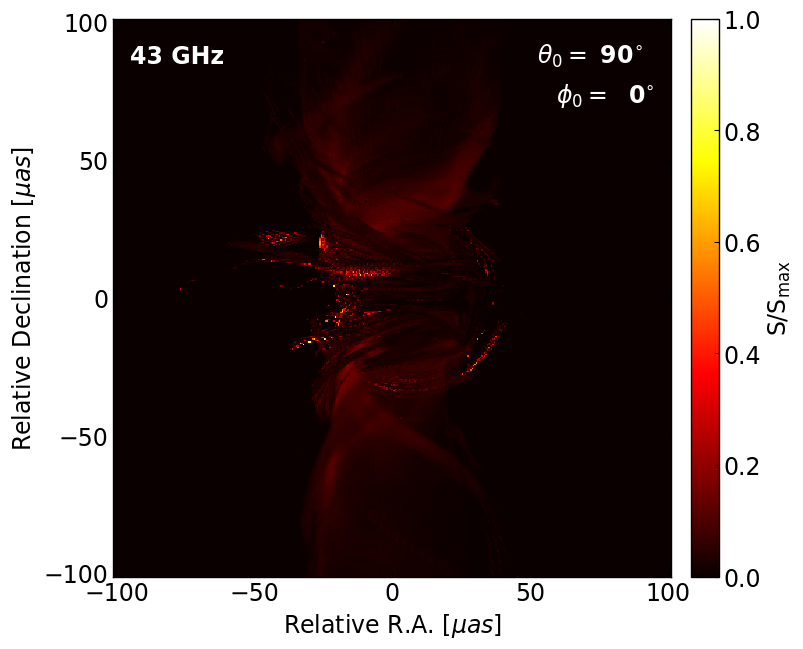

In [39]:
from pyhamrds import bhoss
import matplotlib.pyplot as plt
import os
%matplotlib inline

#datadir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh1/inc10/BHOSS_CODE"
#data = "Rh1_Rl1_sig1_i10_ph0_SgrA_Th_IMAGE_GRMHD_HAMR3D_EHT_MADS41A5_331.dat"

filename  = os.path.join(datadir, data)

figdir = os.environ['PYTHONFIG']
#bhoss.show_image(filename,ifreq=10,cmap='hot',out=os.path.join(figdir,'bhoss_img_David512_201.png'))
bhoss.show_image(filename,ifreq=0,cmap='hot') # Koushik's data - only 230GHz

# Check Average Flux

In [4]:
import os
import numpy as np

#find average flux
def bhoss_avg(Te_model,inclination,model_name, ifreq=2):

    if (model_name == "MADS41A5"):
        model_str = "bhoss_MA05"
        ind_start = 311
        ind_end = 410
    elif (model_name == "MADS41A0"):
        model_str = "bhoss_MA0"
        ind_start = 97
        ind_end = 196
    elif (model_name == "MADS41A93"):
        model_str = "bhoss_MA93"
        ind_start = 96
        ind_end = 195
    elif (model_name == "SANEA93M"):
        model_str = "bhoss_SA93M"
        ind_start=132
        ind_end = 231
    elif (model_name == "SANEA93"):
        model_str = "bhoss_SA93"
        ind_start=99
        ind_end = 198
    else:
        print("no model")
        return
    
    if ((inclination==10) | (inclination==30) | (inclination==50) | (inclination==70) | (inclination==90)):
        inc_str = "inc%d"%inclination
    else:
        print("no model")
        return
    
    basedir = "/lustre04/scratch/astrodoo/BHOSS_EHT"
    workdir = os.path.join(basedir,model_str,Te_model,inc_str,'BHOSS_CODE')
    print("work directory %s"%workdir)
    os.chdir(workdir)
    
    z_tot=np.zeros((ind_end-ind_start+1))
    time =np.zeros((ind_end-ind_start+1))
    ind  =np.zeros((ind_end-ind_start+1))
    
    file_path = os.getcwd()
    
    print("ifreq=%d: Should be checked if it is the correct freqency."%ifreq)
    for image_ind in range(ind_start,ind_end+1):
        data_name="%s_incl_%d_IMAGE_GRMHD_HAMR3D_%s_%d.dat" \
        %(Te_model,inclination,model_name,image_ind)
        filename  = os.path.join(file_path, data_name)
        
        header_1 = np.genfromtxt(filename, max_rows = 1)
        header_2 = np.genfromtxt(filename, skip_header = 1, max_rows = 1)
        header_3 = np.genfromtxt(filename, skip_header = 2, max_rows = 1)
        M           = int(header_1[2])
        Jansky_corr          = header_2[5]
        #ascii2 = np.loadtxt(filename, skiprows = 3, usecols = (0, 1, 2))
        ascii2 = np.loadtxt(filename, skiprows = 3, usecols = (0, 1, ifreq+2))
        data2=ascii2.reshape([M, M, 3])
        z    = data2[:,:,2]*Jansky_corr #convert to Jansky
        z_tot[image_ind-ind_start]=np.sum(z)
        
        ind[image_ind-ind_start] = image_ind
        time[image_ind-ind_start] = header_2[0]   # time
        
        print("%d, flux: %f at %f"%(image_ind,z_tot[image_ind-ind_start],time[image_ind-ind_start]))
        
    dscale = header_2[7]
    print(model_name+Te_model,"Average total flux =", np.sum(z_tot)/(ind_end-ind_start+1), \
          "Jy; density_scale=", dscale)
    return (ind,time,z_tot,dscale) 

In [5]:
ind,time,z_tot,dscale = bhoss_avg("f05_b1", 10, "SANEA93",ifreq=2)

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA93/f05_b1/inc10/BHOSS_CODE
ifreq=2: Should be checked if it is the correct freqency.
99, flux: 2.301861 at 9043.128728
100, flux: 2.193393 at 9054.201523
101, flux: 2.175943 at 9063.696043
102, flux: 2.179123 at 9073.192538
103, flux: 2.167132 at 9084.269539
104, flux: 2.297270 at 9093.760862
105, flux: 2.452323 at 9103.246526
106, flux: 2.395524 at 9114.319883
107, flux: 2.349753 at 9123.813554
108, flux: 2.234392 at 9133.307034
109, flux: 2.196156 at 9144.385666
110, flux: 2.272891 at 9153.878107
111, flux: 2.416765 at 9163.373690
112, flux: 2.402607 at 9174.454441
113, flux: 2.342516 at 9183.942361
114, flux: 2.274893 at 9193.435967
115, flux: 2.266685 at 9204.508599
116, flux: 2.259909 at 9213.993390
117, flux: 2.322405 at 9223.488971
118, flux: 2.288308 at 9234.553237
119, flux: 2.295658 at 9244.039795
120, flux: 2.530976 at 9253.531163
121, flux: 2.607764 at 9264.605898
122, flux: 2.485231 at 9274.096017
123, flux: 2.234

In [6]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA93/f05_b1/inc10/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [7]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA93/f05_b1/inc10/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 99/198/100
average z_tot = 2.063863 Jy, the density scale = 3.300000e-17


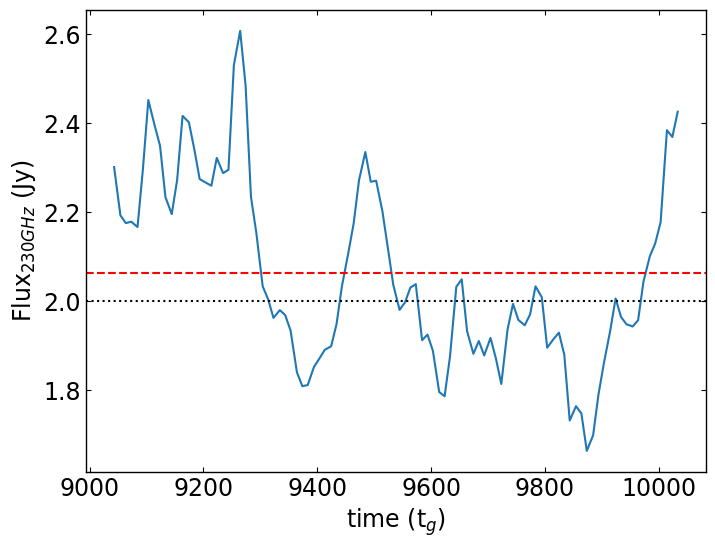

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [9]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

99:: 2.301861 Jy at 9043.128728
100:: 2.193393 Jy at 9054.201523
101:: 2.175943 Jy at 9063.696043
102:: 2.179123 Jy at 9073.192538
103:: 2.167132 Jy at 9084.269539
104:: 2.297270 Jy at 9093.760862
105:: 2.452323 Jy at 9103.246526
106:: 2.395524 Jy at 9114.319883
107:: 2.349753 Jy at 9123.813554
108:: 2.234392 Jy at 9133.307034
109:: 2.196156 Jy at 9144.385666
110:: 2.272891 Jy at 9153.878107
111:: 2.416765 Jy at 9163.373690
112:: 2.402607 Jy at 9174.454441
113:: 2.342516 Jy at 9183.942361
114:: 2.274893 Jy at 9193.435967
115:: 2.266685 Jy at 9204.508599
116:: 2.259909 Jy at 9213.993390
117:: 2.322405 Jy at 9223.488971
118:: 2.288308 Jy at 9234.553237
119:: 2.295658 Jy at 9244.039795
120:: 2.530976 Jy at 9253.531163
121:: 2.607764 Jy at 9264.605898
122:: 2.485231 Jy at 9274.096017
123:: 2.234704 Jy at 9283.585796
124:: 2.152990 Jy at 9293.077161
125:: 2.034000 Jy at 9304.150408
126:: 2.004923 Jy at 9313.640685
127:: 1.962961 Jy at 9323.132694
128:: 1.980507 Jy at 9334.206852
129:: 1.969

In [11]:
ind,time,z_tot,dscale = bhoss_avg("f05_b1", 50, "SANEA93",ifreq=2)

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA93/f05_b1/inc50/BHOSS_CODE
ifreq=2: Should be checked if it is the correct freqency.
99, flux: 2.316829 at 9043.128728
100, flux: 2.273244 at 9054.201523
101, flux: 2.228627 at 9063.696043
102, flux: 2.282244 at 9073.192538
103, flux: 2.174077 at 9084.269539
104, flux: 2.185927 at 9093.760862
105, flux: 2.313832 at 9103.246526
106, flux: 2.254762 at 9114.319883
107, flux: 2.224192 at 9123.813554
108, flux: 2.049097 at 9133.307034
109, flux: 1.908327 at 9144.385666
110, flux: 2.036418 at 9153.878107
111, flux: 2.209067 at 9163.373690
112, flux: 2.273823 at 9174.454441
113, flux: 2.137355 at 9183.942361
114, flux: 2.157189 at 9193.435967
115, flux: 2.458198 at 9204.508599
116, flux: 2.545083 at 9213.993390
117, flux: 2.605831 at 9223.488971
118, flux: 2.498367 at 9234.553237
119, flux: 2.583624 at 9244.039795
120, flux: 2.592210 at 9253.531163
121, flux: 2.582303 at 9264.605898
122, flux: 2.455350 at 9274.096017
123, flux: 2.217

In [12]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA93/f05_b1/inc50/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [13]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA93/f05_b1/inc50/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 99/198/100
average z_tot = 2.077039 Jy, the density scale = 3.200000e-17


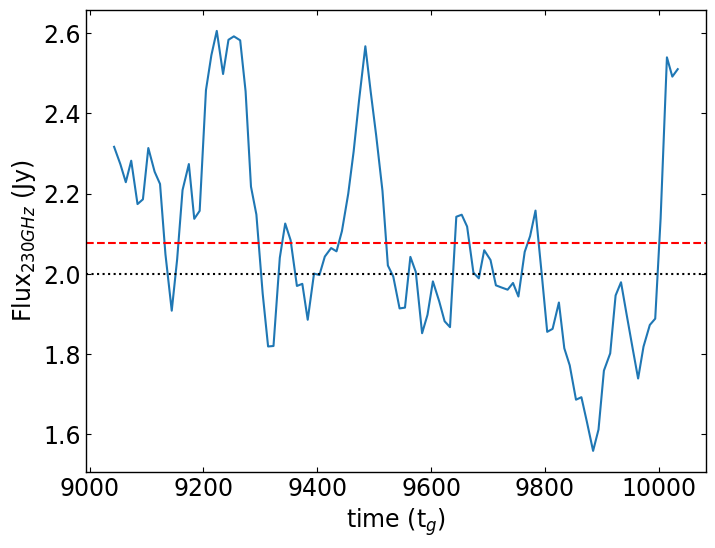

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [15]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

99:: 2.316829 Jy at 9043.128728
100:: 2.273244 Jy at 9054.201523
101:: 2.228627 Jy at 9063.696043
102:: 2.282244 Jy at 9073.192538
103:: 2.174077 Jy at 9084.269539
104:: 2.185927 Jy at 9093.760862
105:: 2.313832 Jy at 9103.246526
106:: 2.254762 Jy at 9114.319883
107:: 2.224192 Jy at 9123.813554
108:: 2.049097 Jy at 9133.307034
109:: 1.908327 Jy at 9144.385666
110:: 2.036418 Jy at 9153.878107
111:: 2.209067 Jy at 9163.373690
112:: 2.273823 Jy at 9174.454441
113:: 2.137355 Jy at 9183.942361
114:: 2.157189 Jy at 9193.435967
115:: 2.458198 Jy at 9204.508599
116:: 2.545083 Jy at 9213.993390
117:: 2.605831 Jy at 9223.488971
118:: 2.498367 Jy at 9234.553237
119:: 2.583624 Jy at 9244.039795
120:: 2.592210 Jy at 9253.531163
121:: 2.582303 Jy at 9264.605898
122:: 2.455350 Jy at 9274.096017
123:: 2.217542 Jy at 9283.585796
124:: 2.148000 Jy at 9293.077161
125:: 1.950748 Jy at 9304.150408
126:: 1.819140 Jy at 9313.640685
127:: 1.820328 Jy at 9323.132694
128:: 2.040225 Jy at 9334.206852
129:: 2.125

In [52]:
ind,time,z_tot,dscale = bhoss_avg("f05_b1", 90, "SANEA93",ifreq=2)

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA93/f05_b1/inc90/BHOSS_CODE
ifreq=2: Should be checked if it is the correct freqency.
99, flux: 2.229193 at 9043.128728
100, flux: 2.375230 at 9054.201523
101, flux: 2.406801 at 9063.696043
102, flux: 2.293378 at 9073.192538
103, flux: 2.229487 at 9084.269539
104, flux: 2.124208 at 9093.760862
105, flux: 2.387687 at 9103.246526
106, flux: 2.288545 at 9114.319883
107, flux: 2.265980 at 9123.813554
108, flux: 2.017049 at 9133.307034
109, flux: 1.872647 at 9144.385666
110, flux: 2.081937 at 9153.878107
111, flux: 2.264268 at 9163.373690
112, flux: 2.350212 at 9174.454441
113, flux: 2.266219 at 9183.942361
114, flux: 2.344355 at 9193.435967
115, flux: 2.708482 at 9204.508599
116, flux: 2.886699 at 9213.993390
117, flux: 2.735833 at 9223.488971
118, flux: 2.449054 at 9234.553237
119, flux: 2.243293 at 9244.039795
120, flux: 2.272893 at 9253.531163
121, flux: 2.400401 at 9264.605898
122, flux: 2.221287 at 9274.096017
123, flux: 1.964

In [53]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA93/f05_b1/inc90/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [54]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA93/f05_b1/inc90/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 99/198/100
average z_tot = 1.989497 Jy, the density scale = 3.400000e-17


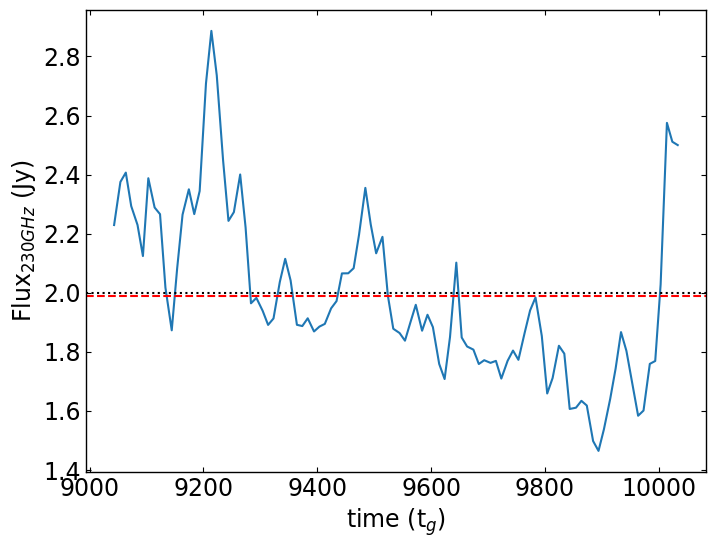

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [56]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

99:: 2.229193 Jy at 9043.128728
100:: 2.375230 Jy at 9054.201523
101:: 2.406801 Jy at 9063.696043
102:: 2.293378 Jy at 9073.192538
103:: 2.229487 Jy at 9084.269539
104:: 2.124208 Jy at 9093.760862
105:: 2.387687 Jy at 9103.246526
106:: 2.288545 Jy at 9114.319883
107:: 2.265980 Jy at 9123.813554
108:: 2.017049 Jy at 9133.307034
109:: 1.872647 Jy at 9144.385666
110:: 2.081937 Jy at 9153.878107
111:: 2.264268 Jy at 9163.373690
112:: 2.350212 Jy at 9174.454441
113:: 2.266219 Jy at 9183.942361
114:: 2.344355 Jy at 9193.435967
115:: 2.708482 Jy at 9204.508599
116:: 2.886699 Jy at 9213.993390
117:: 2.735833 Jy at 9223.488971
118:: 2.449054 Jy at 9234.553237
119:: 2.243293 Jy at 9244.039795
120:: 2.272893 Jy at 9253.531163
121:: 2.400401 Jy at 9264.605898
122:: 2.221287 Jy at 9274.096017
123:: 1.964144 Jy at 9283.585796
124:: 1.982472 Jy at 9293.077161
125:: 1.938496 Jy at 9304.150408
126:: 1.890984 Jy at 9313.640685
127:: 1.912755 Jy at 9323.132694
128:: 2.036196 Jy at 9334.206852
129:: 2.114